In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_columns', None)
import warnings
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly import tools
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn import datasets, linear_model
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
from xgboost.sklearn import XGBRegressor
from sklearn.tree import export_graphviz

warnings.filterwarnings('ignore')
pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 9999
pd.options.display.float_format = '{:20,.2f}'.format
from IPython.display import Image
from IPython.core.display import HTML 

### Project Stages:
The following are the project stages applied:
1.	Problem definition.
2.	Data collection and preprocessing.
3.	EDA.
4.	Examination of seven models for mathematic dataset, while selecting some of them for further examination with different parameters.
5.	Examine selected models on test data.
6.	Conclusion.


### Problem Definition: 

Estimate final grade in mathematic according to given features, while most features are social features. 
In addition, EDA is done on mathematic and Portuguese datasets, but prediction is done only on mathematic data set.  


In [2]:
#Loading mathematic data set
data_mat = pd.read_csv('student-mat.csv',sep = ';')
#Loading Portuguese data set
data_por = pd.read_csv('student-por.csv',sep = ';')
data_mat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

In [3]:
data_mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [4]:
data_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13


# Features Description

There are 33 features in this data. What they represent is given below.

school : Student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)

sex : Student's sex (binary: 'F' - female or 'M' - male)

age : Student's age (numeric: from 15 to 22)

address : Student's home address type (binary: 'U' - urban or 'R' - rural)

famsize : Family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)

Pstatus : Parent's cohabitation status (binary: 'T' - living together or 'A' - living apart)

Medu : Mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education, or 4 - higher education)

Fedu : Father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education, or 4 - higher education)

Mjob : Mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

Fjob : Father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

reason : Reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')

guardian : Student's guardian (nominal: 'mother', 'father' or 'other')

traveltime : Home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)

studytime : Weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)

failures : Number of past class failures (numeric: n if 1<=n<3, else 4)

schoolsup : Extra educational support (binary: yes or no)

famsup : Family educational support (binary: yes or no)

paid : Extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)

activities : Extra-curricular activities (binary: yes or no)

nursery : Attended nursery school (binary: yes or no)

higher : Wants to take higher education (binary: yes or no)

internet : Internet access at home (binary: yes or no)

romantic : With a romantic relationship (binary: yes or no)

famrel : Quality of family relationships (numeric: from 1 - very bad to 5 - excellent)

freetime : Free time after school (numeric: from 1 - very low to 5 - very high)

goout : Going out with friends (numeric: from 1 - very low to 5 - very high)

Dalc : Workday alcohol consumption (numeric: from 1 - very low to 5 - very high)

Walc : Weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

health : Current health status (numeric: from 1 - very bad to 5 - very good)

absences : Number of school absences (numeric: from 0 to 93)

G1 : First period grade (numeric: from 0 to 20)

G2 : Second period grade (numeric: from 0 to 20)

G3 : Final grade (numeric: from 0 to 20, output target)

In [5]:
#Validate nulls on mathematic dataset
data_mat.isnull().any()

school        False
sex           False
age           False
address       False
famsize       False
Pstatus       False
Medu          False
Fedu          False
Mjob          False
Fjob          False
reason        False
guardian      False
traveltime    False
studytime     False
failures      False
schoolsup     False
famsup        False
paid          False
activities    False
nursery       False
higher        False
internet      False
romantic      False
famrel        False
freetime      False
goout         False
Dalc          False
Walc          False
health        False
absences      False
G1            False
G2            False
G3            False
dtype: bool

In [6]:
#Validate nulls on Portuguese dataset
data_por.isnull().any()

school        False
sex           False
age           False
address       False
famsize       False
Pstatus       False
Medu          False
Fedu          False
Mjob          False
Fjob          False
reason        False
guardian      False
traveltime    False
studytime     False
failures      False
schoolsup     False
famsup        False
paid          False
activities    False
nursery       False
higher        False
internet      False
romantic      False
famrel        False
freetime      False
goout         False
Dalc          False
Walc          False
health        False
absences      False
G1            False
G2            False
G3            False
dtype: bool

Text(0.5, 1.0, 'Gender of students : F - female,M - male')

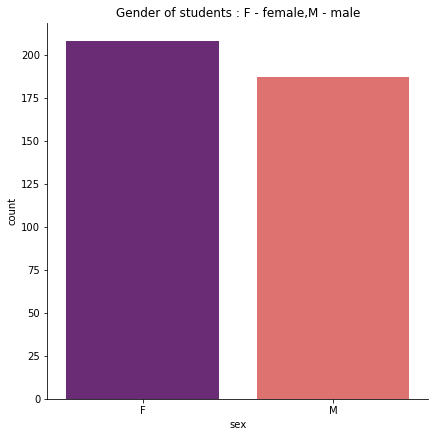

In [7]:
#Display number of students study mathematic according to gender
sns.catplot(x="sex", kind="count",palette="magma", data=data_mat, height = 6)
plt.title("Gender of students : F - female,M - male")

Text(0.5, 1.0, 'Gender of students : F - female,M - male')

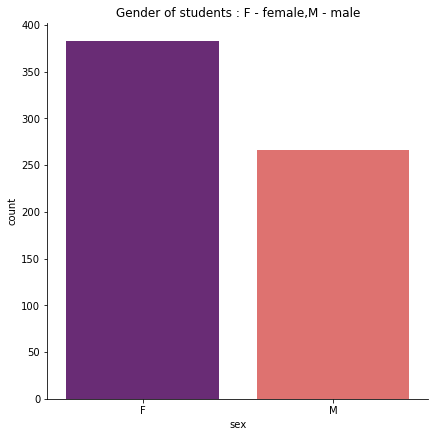

In [8]:
#Display number of students study Portuguese according to gender.
sns.catplot(x="sex", kind="count",palette="magma", data=data_por, height = 6)
plt.title("Gender of students : F - female,M - male")

In [9]:
#Display distribution of math students according to age.
ages_mat = data_mat["age"].value_counts()
labels_mat = (np.array(ages_mat.index))
sizes_mat = (np.array((ages_mat / ages_mat.sum())*100))

ages_por = data_por["age"].value_counts()
labels_por = (np.array(ages_por.index))
sizes_por = (np.array((ages_por / ages_por.sum())*100))

trace = go.Pie(labels=labels_mat, values=sizes_mat)
layout = go.Layout(title="Аge of students")
dat = [trace]
fig = go.Figure(data=dat, layout=layout)
py.iplot(fig, filename="age")


In [10]:
#Display distribution of Portuguese students according to age.
trace = go.Pie(labels=labels_por, values=labels_por)
layout = go.Layout(title="Аge of students")
dat = [trace]
fig = go.Figure(data=dat, layout=layout)
py.iplot(fig, filename="age")

In [11]:
#Display how many hours per week math students spend on their studies.
data_mat['st_time'] = np.nan
df = [data_mat]

for col in df:
    col.loc[col['studytime'] == 1 , 'st_time'] = '< 2 hours'
    col.loc[col['studytime'] == 2 , 'st_time'] = '2 to 5 hours'
    col.loc[col['studytime'] == 3, 'st_time'] = '5 to 10 hours'
    col.loc[col['studytime'] == 4, 'st_time'] = '> 10 hours'  
 
labels = data_mat["st_time"].unique().tolist()
amount = data_mat["st_time"].value_counts().tolist()

colors = ["red", "blue", "grey", "yellow"]

trace = go.Pie(labels=labels, values=amount,
               hoverinfo='label+percent', textinfo='value', 
               textfont=dict(size=20),
               marker=dict(colors=colors, 
                           line=dict(color='#000000', width=2)))
dt = [trace]
layout = go.Layout(title="Study time -Math ")

fig = go.Figure(data=dt, layout=layout)
iplot(fig, filename='pie')

In [12]:
#Display how many hours per week Portugese students spend on their studies.
data_por['st_time'] = np.nan
df = [data_por]

for col in df:
    col.loc[col['studytime'] == 1 , 'st_time'] = '< 2 hours'
    col.loc[col['studytime'] == 2 , 'st_time'] = '2 to 5 hours'
    col.loc[col['studytime'] == 3, 'st_time'] = '5 to 10 hours'
    col.loc[col['studytime'] == 4, 'st_time'] = '> 10 hours'  
 
labels = data_por["st_time"].unique().tolist()
amount = data_por["st_time"].value_counts().tolist()

colors = ["red", "blue", "grey", "yellow"]

trace = go.Pie(labels=labels, values=amount, hoverinfo='label+percent', textinfo='value', 
               textfont=dict(size=20), marker=dict(colors=colors, line=dict(color='#000000', width=2)))

dt = [trace]
layout = go.Layout(title="Study time - Portugese")

fig = go.Figure(data=dt, layout=layout)
iplot(fig, filename='pie')

Text(0.5, 1.0, 'Students address for Portugese courses: U - urban City, R - rural non City')

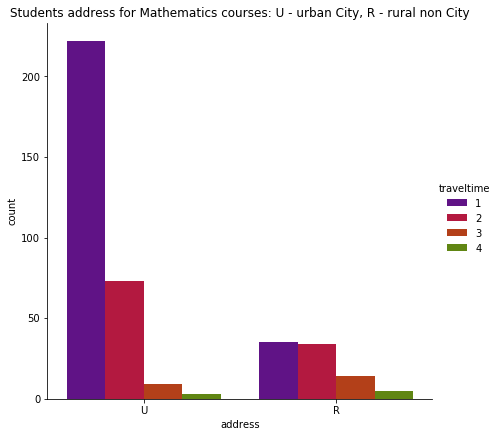

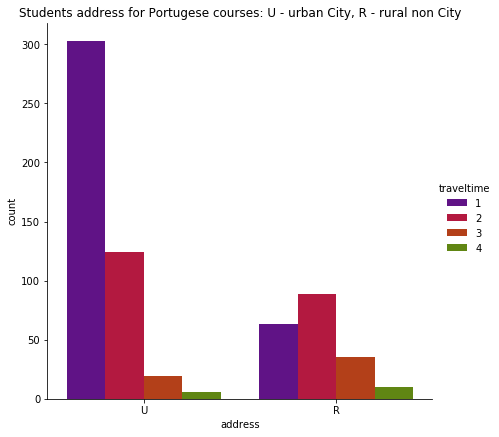

In [13]:
#Display math students travling time urban vs rural.
sns.catplot(x="address", kind="count",hue = "traveltime",palette="brg", data=data_mat, height = 6)
plt.title("Students address for Mathematics courses: U - urban City, R - rural non City")

#Display Portugese students travling time urban vs rural.
sns.catplot(x="address", kind="count",hue = "traveltime",palette="brg", data=data_por, height = 6)
plt.title("Students address for Portugese courses: U - urban City, R - rural non City")

In [14]:
#Categories math & Portuguese students according to their grade.
# 15-20 	Excellent
# 10-15 	Good
# 0-9       Poor   

data_mat['Category_Grade'] = 'na'
data_mat.loc[(data_mat.G3  >= 15) & (data_mat.G3 <= 20), 'Category_Grade'] = 'Excellent' 
data_mat.loc[(data_mat.G3  >= 10) & (data_mat.G3 <= 14), 'Category_Grade'] = 'GOOD' 
data_mat.loc[(data_mat.G3  >= 0) & (data_mat.G3 <= 9), 'Category_Grade'] = 'POOR'

data_por['Category_Grade'] = 'na'
data_por.loc[(data_por.G3  >= 15) & (data_por.G3 <= 20), 'Category_Grade'] = 'Excellent' 
data_por.loc[(data_por.G3  >= 10) & (data_por.G3 <= 14), 'Category_Grade'] = 'GOOD' 
data_por.loc[(data_por.G3  >= 0) & (data_por.G3 <= 9), 'Category_Grade'] = 'POOR' 


data_mat.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,st_time,Category_Grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,2 to 5 hours,POOR
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,2 to 5 hours,POOR
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,2 to 5 hours,GOOD
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,5 to 10 hours,Excellent
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,2 to 5 hours,GOOD


Text(0, 0.5, 'Number of Student')

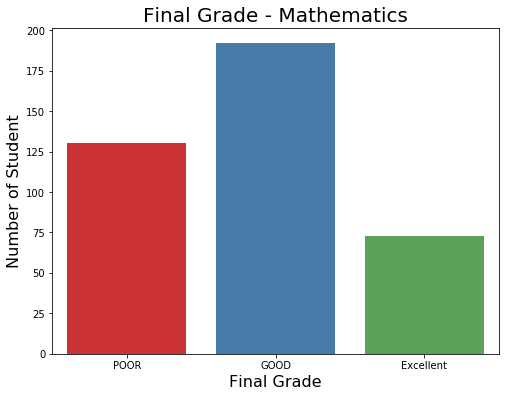

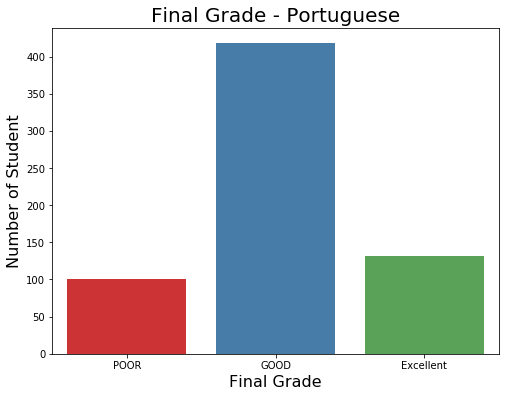

In [15]:
#Display final grade category in math and Portuguese according to category
plt.figure(figsize=(8,6))
sns.countplot(data_mat.Category_Grade, order=["POOR","GOOD","Excellent"], palette='Set1')
plt.title('Final Grade - Mathematics',fontsize=20)
plt.xlabel('Final Grade', fontsize=16)
plt.ylabel('Number of Student', fontsize=16)

plt.figure(figsize=(8,6))
sns.countplot(data_por.Category_Grade, order=["POOR","GOOD","Excellent"], palette='Set1')
plt.title('Final Grade - Portuguese',fontsize=20)
plt.xlabel('Final Grade', fontsize=16)
plt.ylabel('Number of Student', fontsize=16)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5]), <a list of 16 Text yticklabel objects>)

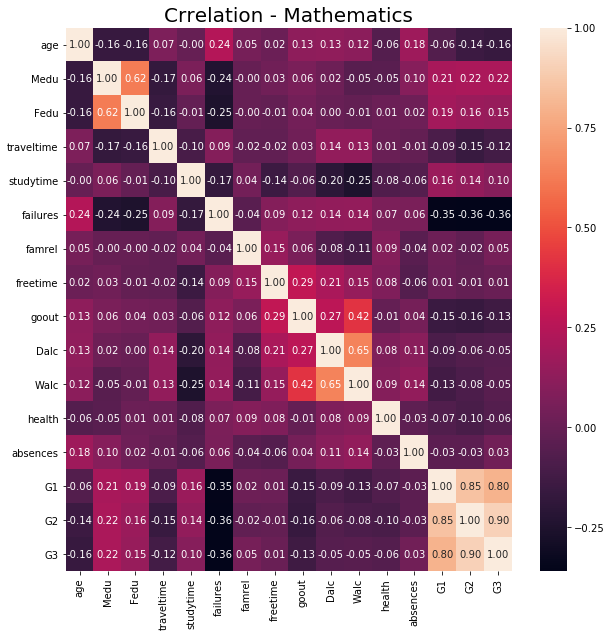

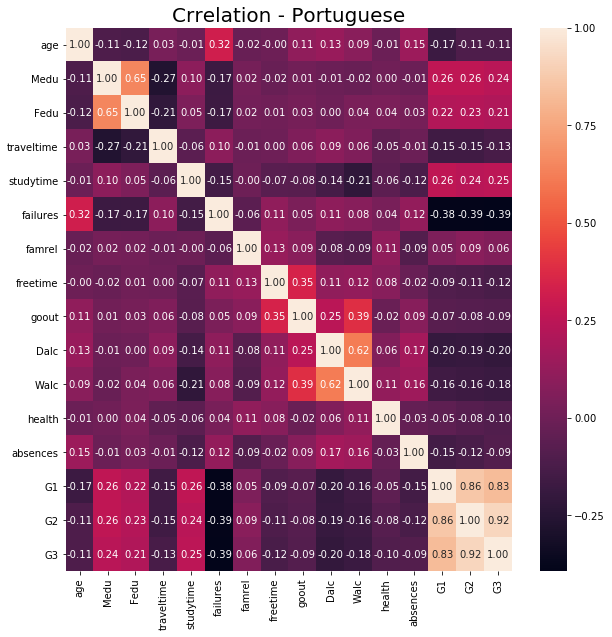

In [16]:
# Display crrelation between features for math and Portugase students
plt.figure(figsize=(10,10))
sns.heatmap(data_mat.corr(),annot = True,fmt = ".2f",cbar = True)
plt.title('Crrelation - Mathematics',fontsize=20)
plt.xticks(rotation=90)
plt.yticks(rotation = 0)

plt.figure(figsize=(10,10))
sns.heatmap(data_por.corr(),annot = True,fmt = ".2f",cbar = True)
plt.title('Crrelation - Portuguese',fontsize=20)
plt.xticks(rotation=90)
plt.yticks(rotation = 0)

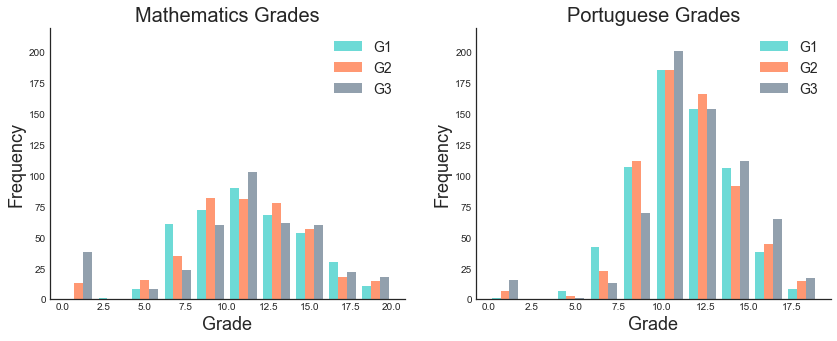

In [17]:
# Display grade distibution for math and Portuguese according G1,G2 & G3 semesters.
fig = plt.figure(figsize=(14,5))
plt.style.use('seaborn-white')
ax1 = plt.subplot(121)
plt.hist([data_mat['G1'], data_mat['G2'], data_mat['G3']], label=['G1', 'G2', 'G3'], color=['#48D1CC', '#FF7F50', '#778899' ], alpha=0.8)
plt.legend(fontsize=14)
plt.xlabel('Grade', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.title('Mathematics Grades', fontsize=20)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
plt.ylim(0,220)

ax2 = plt.subplot(122)
plt.hist([data_por['G1'], data_por['G2'], data_por['G3']], label=['G1', 'G2', 'G3'], color=['#48D1CC', '#FF7F50', '#778899' ], alpha=0.8)
plt.legend(fontsize=14)
plt.xlabel('Grade', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.title('Portuguese Grades', fontsize=20)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
plt.ylim(0,220)

plt.show()

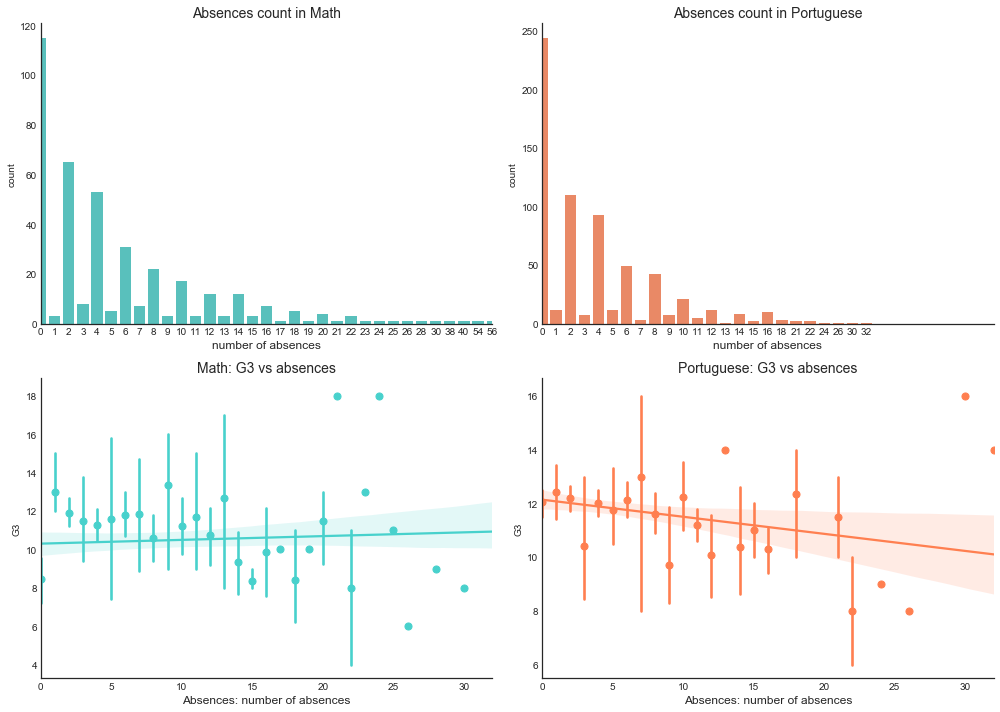

In [18]:
# Display distribution of math and Portuguese students absences
fig = plt.figure(figsize=(14,10))

ax1 = plt.subplot(221)
sns.countplot(data_mat['absences'], color='#48D1CC')
plt.title('Absences count in Math', fontsize=14)
plt.xlabel('number of absences', fontsize=12)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
plt.xlim((0,32))

ax2 = plt.subplot(222)
sns.countplot(data_por['absences'], color='#FF7F50')
plt.title('Absences count in Portuguese', fontsize=14)
plt.xlabel('number of absences', fontsize=12)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
plt.xlim((0,32))

ax3 = plt.subplot(223)
sns.regplot(data_mat['absences'], data_mat['G3'], x_estimator=np.mean, color='#48D1CC')
plt.title('Math: G3 vs absences', fontsize=14)
plt.xlabel('Absences: number of absences', fontsize=12)
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
plt.xlim((0,32))

ax4 = plt.subplot(224)
sns.regplot(data_por['absences'], data_por['G3'], x_estimator=np.mean, color='#FF7F50')
plt.title('Portuguese: G3 vs absences', fontsize=14)
plt.xlabel('Absences: number of absences', fontsize=12)
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)
plt.xlim((0,32))

plt.tight_layout()

In [19]:
# Preprocessing final data while columns that contain Yes/No values will be converted into binary values and categories columns 
# will be enumerated.

math_final = data_mat.copy()
math_final = math_final.drop(['G1', 'G2','st_time','Category_Grade'], axis=1)
# Convert dummy variables values into 0/1.
math_final.school = math_final['school'].replace(['GP', 'MS'], [1,0])
math_final.sex = math_final['sex'].replace(['F','M'],[1,0])
math_final.address = math_final['address'].replace(['U','R'], [1,0])
math_final.famsize = math_final['famsize'].replace(['LE3','GT3'], [1,0])
math_final.Pstatus = math_final['Pstatus'].replace(['T','A'], [1,0])
math_final.schoolsup = math_final['schoolsup'].replace(['yes','no'],[1,0])
math_final.famsup = math_final['famsup'].replace(['yes','no'],[1,0])
math_final.activities = math_final['activities'].replace(['yes','no'],[1,0])
math_final.nursery = math_final['nursery'].replace(['yes','no'],[1,0])
math_final.higher = math_final['higher'].replace(['yes','no'],[1,0])
math_final.internet = math_final['internet'].replace(['yes','no'],[1,0])
math_final.romantic = math_final['romantic'].replace(['yes','no'],[1,0])
math_final.paid = math_final['paid'].replace(['yes','no'],[1,0])

norminal_vars = ['Fjob', 'Mjob', 'reason','guardian','Medu','Fedu','traveltime','studytime']
math_final = pd.get_dummies(math_final, columns= norminal_vars, drop_first=True)
math_final.head()

,school,sex,age,address,famsize,Pstatus,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other,Medu_1,Medu_2,Medu_3,Medu_4,Fedu_1,Fedu_2,Fedu_3,Fedu_4,traveltime_2,traveltime_3,traveltime_4,studytime_2,studytime_3,studytime_4
0,1,1,18,1,0,0,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,6,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0
1,1,1,17,1,0,1,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,6,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0
2,1,1,15,1,1,1,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,10,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0
3,1,1,15,1,0,1,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,15,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0
4,1,1,16,1,0,1,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,10,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0


In [20]:
# Split data into train and test.
X = math_final.drop(['G3'], axis=1)
y = math_final['G3']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model evaluation: quantifying the quality of predictions
We have chosen to use the "Mean Squared Error" method to evaluate the quality of the model.  
Our regression labels are in range of 0 - 20 with a semmi normal distribution and we have no need to use log.  
"Mean Squared Error" was preferred over "Mean Absolute Error", as we wanted the model to "punish" larger errors, and over R^2 because we wanted the units to be understandable.

In [21]:
#Run cross val score on the fpllowing chosen models:
#    1.) LinearRegression
#    2.) DecisionTreeRegressor
#    3.) linear_model.Lasso
#    4.) GradientBoostingRegressor
#    5.) RandomForestRegressor
#    6.) SVR
#    7.) XGBRegressor


#Create the model according to give model name    
def bulid_model(model_name):
        model = model_name()
        return model

#Run the given model and prints the score and std
def run_cross_val_score(model, X, y, cv):
    #Running the scoring with negative mean squared error 
    cv_scores = cross_val_score(model, X, y, cv=cv, scoring='neg_mean_squared_error')
    cv_scores = np.sqrt(abs(cv_scores)) # Convert the given score into RMSE
    print("CV Score cv =", cv, cv_scores, "\n\nMean of cv scores: ", np.mean(cv_scores),"\n")
    print("STD =", cv_scores.std())
            
#Loop through models and run cross val score        
for model_name in [LinearRegression, DecisionTreeRegressor, linear_model.Lasso, GradientBoostingRegressor, RandomForestRegressor, SVR, XGBRegressor]:
    model = bulid_model(model_name)
    print("\n=====================================================================")
    print(model_name,"\n")
    run_cross_val_score(model, X_train, y_train, 5)    


<class 'sklearn.linear_model.base.LinearRegression'> 

CV Score cv = 5 [4.74790528 4.3520132  5.14583924 4.91478758 4.83192752] 

Mean of cv scores:  4.798494563451411 

STD = 0.2596902156217683

<class 'sklearn.tree.tree.DecisionTreeRegressor'> 

CV Score cv = 5 [6.08019325 5.66246343 5.08343091 6.31576511 4.79748611] 

Mean of cv scores:  5.58786776288003 

STD = 0.5756636400458889

<class 'sklearn.linear_model.coordinate_descent.Lasso'> 

CV Score cv = 5 [4.95360016 4.08610313 4.41818871 4.80758088 4.07307567] 

Mean of cv scores:  4.467709710238536 

STD = 0.3620535525694609

<class 'sklearn.ensemble.gradient_boosting.GradientBoostingRegressor'> 

CV Score cv = 5 [4.27739468 3.51252298 4.31041099 4.42488861 3.94812454] 

Mean of cv scores:  4.094668361051527 

STD = 0.3314656941867

<class 'sklearn.ensemble.forest.RandomForestRegressor'> 

CV Score cv = 5 [4.10040013 3.91600298 4.19286999 4.21783816 4.17410764] 

Mean of cv scores:  4.120243780674801 

STD = 0.10936966455516077

<

In [22]:
print("The chosen models are: \n\t 1.) DecisionTreeRegressor \n\t 2.) SVR \n\t 3.) XGBRegressor \n\t 4.) RandomForestRegressor  \n\t 5.) LinearRegression")

The chosen models are: 
	 1.) DecisionTreeRegressor 
	 2.) SVR 
	 3.) XGBRegressor 
	 4.) RandomForestRegressor  
	 5.) LinearRegression


### DecisionTreeRegressor

In [23]:
# criterion (default='mse') - The function to measure the quality : 'mse', 'friedman_mse','mae'
#        1.) mse - mean squared error.
#        2.) friedman_mse - mean squared error : uses mean squared error with Friedman’s improvement score for potential splits.
#        3.) mse - mean squared error : mean absolute error.

# splitter (default='best') - The strategy used to choose the split at each node
#        1.) best - to choose the best split.
#        2.) random -  to choose the best random split.

# max_depth (default='None') - The maximum depth of the tree.

# min_samples_split (default=2) - The minimum number of samples required to split an internal node.

# max_features (default='None') - The number of features to consider when looking for the best split.          
#        int value = then consider max_features features at each split.
#        "auto” = then max_features=n_features.
#        “sqrt” = then max_features=sqrt(n_features).
#        “log2” = then max_features=log2(n_features)

# presort (default=False) - Whether to presort the data to speed up the finding of best splits in fitting


def get_parameters_tuning (model, X_train, y_train, X_test, y_test, cv, params_grid):
    grid = GridSearchCV(model, params_grid, cv=cv, scoring='neg_mean_squared_error')
    grid.fit(X_train, y_train)
    print('Best cross validation score: {:.2f}'.format(np.sqrt(abs(grid.best_score_))))
    print('Best parameters:', grid.best_params_)
    print('Test score:', np.sqrt(abs(grid.score(X_test, y_test))))

params_grid = {'criterion':['mse','friedman_mse','mae'], 'splitter':['best','random'], 'max_depth':[10,100,1000], 
               'min_samples_split':[5,10,20,40,80,160], 'min_samples_leaf':[1,2,3,4,5,10], 
               'max_features':['auto','sqrt','log2'], 'presort':[True,False] }

get_parameters_tuning(DecisionTreeRegressor(), X_train, y_train, X_test, y_test, 5, params_grid)

Best cross validation score: 4.15
Best parameters: {'criterion': 'mse', 'max_depth': 1000, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 40, 'presort': True, 'splitter': 'best'}
Test score: 4.649713804576034


In [24]:
decision_tree_regressor_model = DecisionTreeRegressor(max_depth=10, min_samples_leaf=10, min_samples_split=40, presort=True)
decision_tree_regressor_model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=10,
                      min_samples_split=40, min_weight_fraction_leaf=0.0,
                      presort=True, random_state=None, splitter='best')

In [25]:
dt_predictions = decision_tree_regressor_model.predict(X_train)

In [26]:
def print_rmse(orig_values, predict_values):
    rmse = np.sqrt(MSE(orig_values, predict_values))
    print("RMSE = {:.2f}".format(rmse))

In [27]:
#DecisionTreeRegressor RMSE for train data
print('Predict RMSE with floting prediction : ')
print_rmse(y_train, dt_predictions)

Predict RMSE with floting prediction : 
RMSE = 3.60


Text(0.5, 1.0, 'Display the Difference Between Predicted G3 and Actual G3')

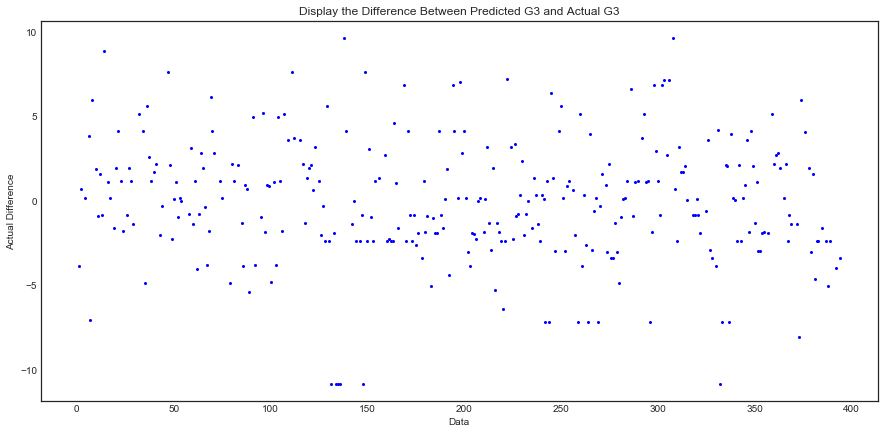

In [28]:
#Display the Difference Between Predicted G3 and Actual G3
plt.figure(figsize=(15,7))
plt.plot(y_train-dt_predictions, '.b', markersize=4)
plt.xlabel('Data')
plt.ylabel('Actual Difference')
plt.title('Display the Difference Between Predicted G3 and Actual G3')

In [29]:
#DecisionTreeRegressor RMSE for test data
dt_test_predictions = decision_tree_regressor_model.predict(X_test)
print('Predict RMSE with floting prediction : ')
print_rmse(y_test, dt_test_predictions)

Predict RMSE with floting prediction : 
RMSE = 4.43


In [30]:
export_graphviz(decision_tree_regressor_model, out_file ='tree.dot')  
Image(url= "tree.jpg")

### SVR

In [31]:
#SVR
params_grid = {'gamma': [1e-3,1e-1,1e0,1e1,1e10,1e50], 'C':[1e-3,1e-1,1e0,1e1,1e10,1e50]}
get_parameters_tuning(SVR(), X_train, y_train, X_test, y_test, 5, params_grid)

Best cross validation score: 4.09
Best parameters: {'C': 10000000000.0, 'gamma': 0.1}
Test score: 4.1160139324615574


In [32]:
svr_model = SVR(C=10.0, gamma=0.001)
svr_model.fit(X_train, y_train)
svr_predictions = svr_model.predict(X_train)

#SVR RMSE for train data
print('Predict RMSE with floting prediction for SVR model : ')
print_rmse(y_train, svr_predictions)

Predict RMSE with floting prediction for SVR model : 
RMSE = 4.21


Text(0.5, 1.0, 'SVR - Display the Difference Between Predicted G3 and Actual G3')

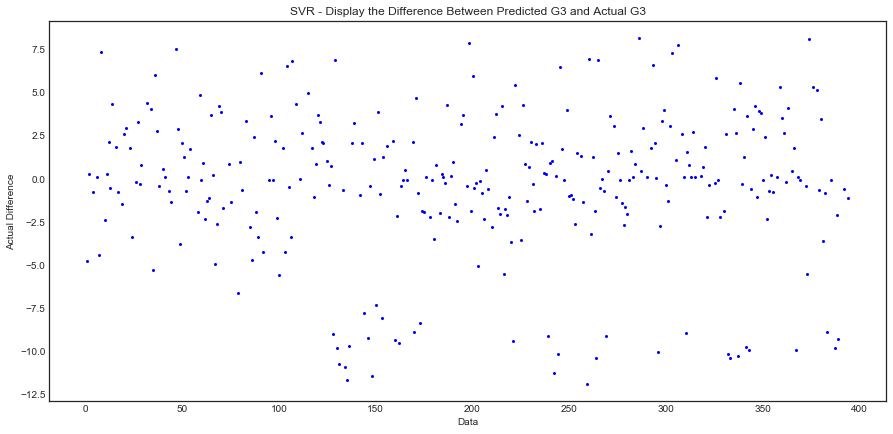

In [33]:
plt.figure(figsize=(15,7))
plt.plot(y_train-svr_predictions, '.b', markersize=4)
plt.xlabel('Data')
plt.ylabel('Actual Difference')
plt.title('SVR - Display the Difference Between Predicted G3 and Actual G3')

In [34]:
#SVR RMSE for test data
svr_test_predictions = svr_model.predict(X_test)
print('Predict RMSE with floting prediction (SVR-test) : ')
print_rmse(y_test, svr_test_predictions)

Predict RMSE with floting prediction (SVR-test) : 
RMSE = 4.15


### XGBRegressor

In [35]:
#XGBRegressor
grid_params = {'max_depth':[2,3,5,7], 'learning_rate':[0.001,0.01,0.1], 'n_estimators':[50,100,200]}
get_parameters_tuning(XGBRegressor(), X_train, y_train, X_test, y_test, 5, grid_params)

Best cross validation score: 4.01
Best parameters: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 50}
Test score: 4.083522858118906


In [36]:
model_XGBRegressor = XGBRegressor(max_depth=2,learning_rate=0.1, n_estimators=50)
model_XGBRegressor.fit(X_train,y_train)
xgbregressor_train_predictions = model_XGBRegressor.predict(X_train)

#XGBRegressor RMSE for train data
print('Predict RMSE with floting prediction for XGBRegressor model : ')
print_rmse(y_train, xgbregressor_train_predictions)

Predict RMSE with floting prediction for XGBRegressor model : 
RMSE = 3.34


Text(0.5, 1.0, 'XGBRegressor - Display the Difference Between Predicted G3 and Actual G3')

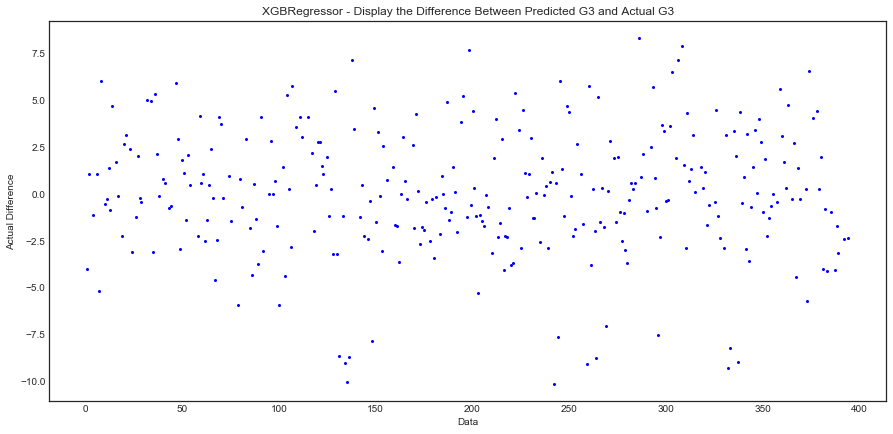

In [37]:
plt.figure(figsize=(15,7))
plt.plot(y_train-xgbregressor_train_predictions, '.b', markersize=4)
plt.xlabel('Data')
plt.ylabel('Actual Difference')
plt.title('XGBRegressor - Display the Difference Between Predicted G3 and Actual G3')

In [38]:
#XGBRegressor RMSE for test data
xgbregressor_test_predictions = model_XGBRegressor.predict(X_test)
print('Predict RMSE with floting prediction (XGBRegressor-test) : ')
print_rmse(y_test, xgbregressor_test_predictions)

Predict RMSE with floting prediction (XGBRegressor-test) : 
RMSE = 4.08


### RandomForestRegressor

In [39]:
#RandomForestRegressor
params_grid = {'n_estimators':[5,10,50,100,500],'max_depth':[1,3,5,7],'min_samples_leaf':[5]}
get_parameters_tuning(RandomForestRegressor(), X_train, y_train, X_test, y_test, 5, params_grid)

Best cross validation score: 3.89
Best parameters: {'max_depth': 7, 'min_samples_leaf': 5, 'n_estimators': 100}
Test score: 3.938340672188345


In [40]:
best_RFR = RandomForestRegressor(n_estimators=500, max_depth=7, min_samples_leaf=5)
best_RFR.fit(X_train, y_train)

randomforest_train_predictions = best_RFR.predict(X_train)
print('Predict RMSE with floting prediction (RandomForestRegressor-train) : ')
print_rmse(y_train, randomforest_train_predictions)

randomforest_test_predictions = best_RFR.predict(X_test)
print('\nPredict RMSE with floting prediction (RandomForestRegressor-test) : ')
print_rmse(y_test, randomforest_test_predictions)


Predict RMSE with floting prediction (RandomForestRegressor-train) : 
RMSE = 2.86

Predict RMSE with floting prediction (RandomForestRegressor-test) : 
RMSE = 3.98


### LinearRegression

In [41]:
params_grid = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
get_parameters_tuning(LinearRegression(), X_train, y_train, X_test, y_test, 5, params_grid)

Best cross validation score: 4.81
Best parameters: {'copy_X': True, 'fit_intercept': True, 'normalize': False}
Test score: 4.312081731520781


In [42]:
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train,y_train)
linear_regression_predictions = linear_regression_model.predict(X_train)

print('Predict RMSE with floting prediction (LinearRegression-train) : ')
print_rmse(y_train, linear_regression_predictions)


linear_regression_test_predictions = linear_regression_model.predict(X_test)
print('\nPredict RMSE with floting prediction (LinearRegression-test) : ')
print_rmse(y_test, linear_regression_test_predictions)


Predict RMSE with floting prediction (LinearRegression-train) : 
RMSE = 3.80

Predict RMSE with floting prediction (LinearRegression-test) : 
RMSE = 4.31


### Conclusion:
   

#### The following are the final tests results:
#####    1.) RandomForestRegressor: 3.97
#####    2.) XGBRegressor: 4.08
#####    3.) SVR: 4.15
#####    4.) LinearRegression: 4.31
#####    5.) DecisionTreeRegressor: 4.43    


### Model Ensemble

In [43]:
#Model ensemble
model_ensemble_df = pd.DataFrame(randomforest_test_predictions,columns=['RF'])
model_ensemble_df['XGB'] = xgbregressor_test_predictions
model_ensemble_df['SVR'] = svr_test_predictions
model_ensemble_df['AVG'] = model_ensemble_df.median(axis=1)

print_rmse(y_test, model_ensemble_df['AVG'])

RMSE = 4.01
